# Unit 5 - Financial Planning

In [78]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json
import numpy as np
import hvplot.pandas  # noqa
import matplotlib.pyplot as plt
import random
import holoviews as hv
from tqdm import tqdm
import investpy

%matplotlib inline

In [79]:
# Load .env enviroment variables
load_dotenv(dotenv_path='API.env')

Python-dotenv could not parse statement starting at line 3


True

In [80]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
api = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version = "v2")
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [81]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [82]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [83]:
# Fetch current BTC price
# Fetch current BTC price
current_btc_price = requests.get(btc_url).json()
current_btc_value = current_btc_price['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
current_eth_price = requests.get(eth_url).json()
current_eth_value = current_eth_price['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = current_btc_value * my_btc     
my_eth_value = current_eth_value * my_eth    

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $26801.60
The current value of your 5.3 ETH is $8913.41


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [84]:
# Set current amount of shares
# Current amount of shares
shares_data = {
    "shares": [50, 200]
}

tickers = ["SPY", "AGG"]
df_shares = pd.DataFrame(shares_data, index=tickers)
df_shares

,shares
SPY,50
AGG,200


In [85]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url="https://paper-api.alpaca.markets",
    api_version="v2")

In [86]:
# Format current date as ISO format

today = pd.Timestamp("2021-03-15", tz="America/New_York").isoformat() 

# Set the tickers
tickers = ["SPY","AGG"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2021-03-15 04:00:00+00:00,113.60,114.010,113.60,113.91,5001788,18489,113.913419,AGG
2021-03-15 04:00:00+00:00,394.33,396.685,392.03,396.48,73592302,442250,394.523028,SPY


In [87]:
AGG = df_portfolio[df_portfolio['symbol']=="AGG"].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=="SPY"].drop('symbol', axis=1)

In [90]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["close"][0]  
spy_close_price = df_portfolio["close"][1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.91
Current SPY closing price: $396.48


In [91]:
# Compute the current value of shares
my_spy = df_shares.loc["SPY"]["shares"]
my_agg = df_shares.loc["AGG"]["shares"]

my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19824.00
The current value of your 200 AGG shares is $22782.00


### Savings Health Analysis

In [92]:
# Set monthly household income
monthly_income = 12000
crypto_amount = my_btc_value + my_eth_value 
shares_amount = my_spy_value + my_agg_value 

# Create savings DataFrame
df_savings = pd.DataFrame({'amount':[crypto_amount,shares_amount]})
df_savings.rename(index={0: 'crypto', 1: 'shares'}, inplace=True)


# Display savings DataFrame
display(df_savings)

,amount
crypto,35715.005838
shares,42606.000000


<AxesSubplot:ylabel='amount'>

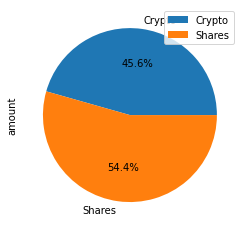

In [93]:
# Plot savings pie chart
labels = 'Crypto', 'Shares'
df_savings.plot.pie(y='amount',subplots=False, autopct='%1.1f%%',labels=labels)

In [95]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["amount"][0] + df_savings["amount"][1]
# Validate saving health
# Check total savings is more than required emergency funds
if total_savings > emergency_fund:
    print(f"Congratulations you have more than enough money in your investments in case of an emergency")
# Check total savings is equal to the required emergency funds
elif total_savings == emergency_fund:
    print(f"Congratulations you have reached your financial goal of having enough money in case of emergency")
# Check total savings is less than required emergency funds
elif total_savings < emergency_fund:
    print(f"You are ${(round(total_savings-emergency_fund,2)*-1)} away from having enough money in case of emergency") 

Congratulations you have more than enough money in your investments in case of an emergency


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [96]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [97]:
# Get 5 years' worth of historical data for SPY and AGG
timeframe = "1D"

# Reorganize the DataFrame
# Separate ticker data
df_stock_data = api.get_bars(tickers, timeframe, start=start_date, end=end_date, limit=1000).df

# Concatenate the ticker DataFrames

# Display sample data
df_stock_data

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.605,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.810,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.860,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.140,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.970,2718710,12697,111.031967,AGG
...,...,...,...,...,...,...,...,...
2020-04-15 04:00:00+00:00,117.03,117.3050,116.7100,117.240,4367410,19620,117.144915,AGG
2020-04-16 04:00:00+00:00,117.19,117.5250,117.1900,117.390,4744716,16906,117.399687,AGG
2020-04-17 04:00:00+00:00,117.52,117.6200,117.0350,117.250,4949824,25621,117.358347,AGG


In [99]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_yrs = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],   
    num_simulation = 500,
    num_trading_days = 252*30
)

IndexError: Too many levels: Index has only 1 level, not 2

In [100]:
# Printing the simulation input data
MC_30_yrs.portfolio_data.head()

NameError: name 'MC_30_yrs' is not defined

In [59]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

NameError: name 'MC_30year' is not defined

In [60]:
# Plot simulation outcomes
MC_30year.portfolio_data.plot_simulation()

NameError: name 'MC_30year' is not defined

In [61]:
# Plot probability distribution and confidence intervals
MC_30year.plot_distribution()

NameError: name 'MC_30year' is not defined

### Retirement Analysis

In [62]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_30year_summary = MC_30year.summarize_cumulative_return()
# Print summary statistics
print(MC_30year_summary)

NameError: name 'MC_30year' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [63]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_20k = round(MC_30year_summary[8]*initial_investment_30yr_20K,2)
ci_upper_20k = round(MC_30year_summary[9]*initial_investment_30yr_20K,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'MC_30year_summary' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [64]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_30k = round(MC_30year_summary[8]*initial_investment_30yr_30K,2)
ci_upper_30k = round(MC_30year_summary[9]*initial_investment_30yr_30K,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'MC_30year_summary' is not defined

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [65]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_30year_dist_5yrs = MCSimulation(portfolio_data = df_stock_data,weights = [0.4,0.6],num_simulation = 500,num_trading_days = 252*5)

IndexError: Too many levels: Index has only 1 level, not 2

In [66]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_30year_5yrs.calc_cumulative_return()

NameError: name 'MC_30year_5yrs' is not defined

In [67]:
# Plot simulation outcomes
MC_30year_5yrs.plot_simulation()

NameError: name 'MC_30year_5yrs' is not defined

In [68]:
# Plot probability distribution and confidence intervals
MC_30year_5yrs.plot_distribution()

NameError: name 'MC_30year_5yrs' is not defined

In [69]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_30year_summary_5yrs = MC_30year_dist_5yrs.summarize_cumulative_return()
# Print summary statistics
print(MC_30year_summary_5yrs)

NameError: name 'MC_30year_dist_5yrs' is not defined

In [70]:
# Set initial investment
initial_investment_60K = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_5yrs = round(MC_30year_summary_5yrs[8]*initial_investment_60K,2)
ci_upper_5yrs = round(MC_30year_summary_5yrs[9]*initial_investment_60K,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'MC_30year_summary_5yrs' is not defined

### Ten Years Retirement Option

In [71]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_30year_dist_10yrs = MCSimulation(portfolio_data = df_stock_data,weights = [0.4,0.6],num_simulation = 500,num_trading_days = 252*10)

IndexError: Too many levels: Index has only 1 level, not 2

In [72]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_30year_10yrs.calc_cumulative_return()

NameError: name 'MC_30year_10yrs' is not defined

In [73]:
# Plot simulation outcomes
MC_30year_10yrs.plot_simulation()

NameError: name 'MC_30year_10yrs' is not defined

In [74]:
# Plot probability distribution and confidence intervals
MC_30year_10yrs.plot_distribution()

NameError: name 'MC_30year_10yrs' is not defined

In [75]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_30year_summary_10yrs = MC_30year_10yrs.summarize_cumulative_return()

# Print summary statistics
print(MC_30year_summary_10yrs)

NameError: name 'MC_30year_10yrs' is not defined

In [76]:
# Set initial investment
initial_investment_60K = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_10yrs = round(MC_30year_summary_10yrs[8]*initial_investment_60K,2)
ci_upper_10yrs = round(MC_30year_summary_10yrs[9]*initial_investment_60K,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

NameError: name 'MC_30year_summary_10yrs' is not defined